# 2. K-means Clustering

### Clustering of Data


In this section, we will consider the problem of clustering into $k$ groups a set of unlabelled points in a coordinate plane $\mathbb{R}^2.$ For example, the left panel of  the figure below is a scatterplot of a data set from the Chicago Data Portal that shows the locations of 1,000 recent acts of violence in the city of Chicago. Police departments may use data like this to help identify clusters or ``hot spots" in their violence reduction efforts. Another question is whether these crime locations might be naturally divided in some way, say, into two halves. 

We can use $k$-means clustering to separate the mapped crime data as points in $\mathbb{R}^2$ into an arbitrary number of groups solely based on location, as seen in the right panel of the figure below. This figure shows  $k=2$ clusters.  The I-55 Stevenson Expressway, which runs northeast from Stickney to downtown Chicago, is close to the boundary between the two clusters. High-density areas exist within each cluster, one  in the West side and the other in much of the South side of the city. These areas reflect of a long history of injustices in these parts of Chicago [Amdat 2021].

<table><tr>
<td> 
<img src="fig6a.png" width="200px">  </td>
<td> <img src="fig6b.png" width="200px"> </td>
</tr></table>

(Left) Map of 1,000 most recently recorded violent occurrences in Chicago. 

(Right)  Data points clustered into $k=2$ groups by a $k$-means algorithm.  Data source: Chicago Data Portal https://data.cityofchicago.org/Public-Safety/Violence-Reduction-Victims-of-Homicides-and-Non-Fa/gumc-mgzr. 

Data was extracted on December 7th, 2022. Map tiles by Stamen Design, under CC by 3.0. Data by © OpenStreetMap, under ODbL.


As discussed in the previous section on OLS linear regression, minimization of a loss function $J(c_0,c_1)$ is the basis for finding a line $y=c_0+c_1 x$ which best fits a collection of data points $(x_1,y_1), (x_2,y_2),\dots (x_n,y_n).$ We show how minimization of a different loss function is basic to a particular method to cluster data into $k$ groups called <i>k-means clustering</i>.    We begin by describing three recursive methods for locating a minimum point of a loss function, the first of which is <i>gradient descent</i>.


### Optimization by Gradient Descent

Recall that given a function $J(w_1,w_2,\dots,w_s)$, the gradient of $J$ (denoted $\nabla J$) is the vector
$$
\nabla J(w_1,w_2,\dots,w_s) = \left\langle\frac{\partial J}{\partial w_1},\frac{\partial J}{\partial w_2},\dots,\frac{\partial J}{\partial w_s}\right\rangle.
$$
If $J(w_1,.w_2,\dots,w_s)$ has a maximum or minimum at a differentiable interior point $\mathbf{w}^*=(w_1^*,w_2^*,\dots,w_s^*)$, then $\nabla J (\mathbf{w}^*)=\mathbf{0}$. That is, all the partials of $J$ must equal zero at $\mathbf{w}^*.$ Hence, to find a max or min point $\mathbf{w^*}$ of $J$, we look for a solution to  $\nabla J=\mathbf{0}$.

Let us consider the one-dimensional case to find a minimum point $w^*$ of a function of one variable $J=J(w)$. Recall Newton's method, which says that to find a root $w^*$ of $J(w)$, we can use the iterative algorithm
$$
w_{n+1}=w_n-\frac{J(w_n)}{J'(w_n)},
$$
where the sequence $w_n\rightarrow w^*$.
If we wish to find a root $w^*$ of $J'(w)$ rather than of $J(w)$, Newton's method becomes
$$
w_{n+1}=w_n-\frac{J'(w_n)}{J''(w_n)},
$$
where the sequence $w_n\rightarrow w^*$. If $\sigma$ is a positive constant near $\frac{1}{J''(w^*)}>0$, then
we can modify the last equation as
$$
w_{n+1}=w_n - \sigma J'(w_n).
$$

Generalizing  to functions of more than one variable, we obtain the <i>gradient descent </i> recursive method to find a minimum point for $J$:
$$
\mathbf{w}_{n+1}=  \mathbf{w}_n - \sigma \nabla J(\mathbf{w}_n),
$$
where $\sigma$ is a positive constant called the <i>learning rate.</i>



### Example 3.1.

Let $J(w_1,w_2)=w_1^2+2w_1+w_2^2+4w_2,$ $\mathbf{w}_0=(0,0)$ and $\sigma=0.1$.  Find $\mathbf{w}_1$ and $\mathbf{w}_2.$ To which point do we expect the gradient descent sequence $\mathbf{w}_n$ to converge?

<b>Solution:</b>  
We have $\nabla J=(2w_1+2,2w_2+4).$

$$
\mathbf{w}_1  \mathbf{w}_0-\sigma\nabla J (\mathbf{w}_0) =(0,0)-0.1(2,4)=(-0.2,-0.4)
$$

$$
\mathbf{w}_2=\mathbf{w}_1-\sigma\nabla J(\mathbf{w}_1) =(-0.2,-0.4)-0.1(1.6,3.2)=(-0.36,-0.72).
$$

Note that $J=(w_1+1)^2+(w_2+2)^2-5$ has a minimum point at $\mathbf{w}^*=(-1,-2)$. That point is where we would expect the gradient descent sequence $\mathbf{w}_n$ to converge. 


We continue with minimizing a loss function $J(w_1,w_2,\dots,w_s)$ by introducing two additional methods of optimization.

#### Coordinate Descent

In contrast to gradient descent, <i>coordinate descent</i> seeks to minimize the value of $J$ one coordinate at a time. For example, to minimize $J$, we begin with an initial point $\mathbf{w}_0$ which specifies the values for $(w_1,w_2,\dots,w_s)$ and look for the minimum value of $J$ obtainable by varying $w_1$ and keep the remaining variables $w_2,\dots,w_s$ fixed. After finding the value of $w_1$ that gives a minimum  $J$, we continue by varying the value of $w_2$ to further minimize $J$ while keeping the newly obtained $w_1$ and the other variables fixed.  We continue this process until the value of $J$ remains unchanged (or only changes at each step by an amount less than a specified threshold) when cycling through all $n$ variables.


#### Optimization by Coordinate and Block Descent

#####  Example 3.2.
Use  coordinate descent to minimize 

$$J(w_1,w_2)=(w_1-1)^2 + (w_2-2)^2,$$ 

beginning with the initial point $\mathbf{w}_0= (w_1,w_2)=(0,0)$.

<b> Solution: </b>

First we fix $w_2=0$ and minimize $J=(w_1-1)^2+4.$ The value $w_1=1$ gives the minimum $J$.  Next, we fix $w_1=1$ and minimize $J=(w_2-2)^2.$ The value $w_2=2$ gives the minimum.  The result $J=0$ is unchanged if we cycle through $w_1$ and then $w_2$. Hence, coordinate descent in this case correctly gives $\mathbf{w}=(1,2)$ as the point that minimizes $J$.    
    

#### Block Descent

Block descent is similar to coordinate descent except we minimize $J$ over blocks of variables rather than a single variable. The $k$-means clustering method is based on block descent, as we  now explain.


####  K-MEANS CLUSTERING OPTIMIZATION PROBLEM  

Find $\mathbf{z}_1,\dots,\mathbf{z}_k$ and $y_{i,j}$ that 
$$
     minimize \,  J(\mathbf{z}_1,\dots,\mathbf{z}_k; y_{i,j}) = \sum_{j=1}^k\sum_{i=1}^m y_{ij}\|\mathbf{x}_i-\mathbf{z}_j\|^2,
$$
subject to the constraints  $y_{i,j}\in\{0,1\}$ for all $i,j$,  and
 $\sum_{j=1}^k y_{i,j}=1$ (each data point is assigned to exactly one centroid).


 In this case, the loss function $J$ is the total squared distance between data points and their assigned centers (prototypes). 
 
 Two blocks of variables are used in block descent minimization of $J$:

<ul>
    <li>  the prototype variables  $\mathbf{z}_1,\dots,\mathbf{z}_k$  and </li>
    <li>the assignment variables $y_{i,j}$ $(1\le i \le m$ and $1\le j \le k$). </li>

Block descent in this case results in a two-step iterative algorithm:

<ul>
  <li> Fix the prototype variables, and then specify $y_{ij}$ so that each data point $\mathbf{x}_i$ is assigned to the closest center $\mathbf{z}_j$.</li>
  <li> Fix each assignment $y_{i,j}$ and choose the cluster center (prototype) to be the mean of the points in its cluster.
</li>
</ul>

We continue this process until the value of $J$ either is unchanged or only changes by some amount less than a specified threshold after completing the two steps in the algorithm.


#### Example 3.3.

Use $k$-means clustering with $k=2$ to divide the points $\mathbf{x}_1=(0,0)$, $\mathbf{x}_2=(10,0)$, $\mathbf{x}_3=(10,1)$, and $\mathbf{x}_4=(0,1)$ into two clusters. Begin with the prototypes $z_1=(0,0)$ and $z_2=(10,0)$.




<b> Solution:</b>

<ul>
 <li> Fix the prototypes $z_1=(0,0)$ and $z_2=(10,0)$; we have $y_{1,1}=1$, $y_{1,2}=0$, $y_{2,1}=0$, $y_{2,2}=1$, $y_{3,1}=0$, $y_{3,2}=1$, $y_{4,1}=1$,  and $y_{4,2}=0$;</li>
 <li> Fix each assignment $y_{i,j}$; then the prototypes are $\mathbf{z}_1=(0,0.5)$ and $\mathbf{z}_2=(10,0.5)$.</li>
 <li>Fixing the prototypes  $\mathbf{z}_1=(0,.5)$, $\mathbf{z}_2=(10,.5)$, the assignment variables are the same as before: $y_{1,1}=1$, $y_{1,2}=0$, $y_{2,1}=0$, $y_{2,2}=1$, $y_{3,1}=0$, $y_{3,2}=1$, $y_{4,1}=1$, and y$_{4,2}=0$.</li>
   <li>Fixing the assignment variables,  the prototype variables are the same as before: $\mathbf{z}_1=(0,0.5)$ and $\mathbf{z}_2=(10,0.5)$.
    </li></ul>
    
Observing that $y_{1,1}=1$ and $y_{4,1}=1$,  the points $\mathbf{x_1}=(0,0)$ and $\mathbf{x_4}=(0,1)$ are assigned to cluster 1. Furthermore, since $y_{2,2}=1$ and $y_{3,2}=1$, the points $\mathbf{x_2}=(10,0)$ and $\mathbf{x_3}=(10,1)$ are assigned to cluster 2.



#### Proof of Block Descent's Stepwise Minimization of $J$

Since $J$ is the sum of squared distances between data points and their cluster centers, it is clear that if we fix the prototypes, $J$ will be minimized by assigning each data point to the nearest prototype. We now show that for any fixed choice of assignment variables, the loss function $J$ is minimized when each prototype is the mean of the points in its cluster. 

Let
$J=\sum_{j=1}^k O_j$ where $O_j=\sum_{i-1}^my_{i,j}\|\mathbf{x}_{i}-\mathbf{z}_j\|^2.$ Note that $O_j$ can be computed using only the points in cluster $j$,  since otherwise $y_{i,j}=0$. Denote these points $\mathbf{u}_1,\dots,\mathbf{u}_{n_j}.$ Then for each $j$, we minimize

$$
O_j(z_{j,1},\dots,z_{j,m}) = (u_{1,1}-z_{j,1})^2+\dots+(u_{1,m}-z_{j,m})^2+
(u_{2,1}-z_{j,1})^2+\dots+(u_{2,m}-z_{j,m})^2+
\dots+
(u_{n_j,1}-z_{j,1})^2+\dots+(u_{n_j,m}-z_{j,m})^2.
$$

The condition $\nabla O_j(z_{j,1},\dots,z_{j,m})=(0,\dots,0)$ will be satisfied if we choose $\mathbf{z}_j$ to be the average of  the points $\mathbf{u}_1,\dots,\mathbf{u}_{n_j}.$  For example,

$$
\frac{\partial O_j}{\partial z_{j,1}}=-2(u_{1,1}-z_{j,1})-2(u_{2,1}-z_{j,1})-\dots-2(u_{n_j,1}-z_{j,1})=0\qquad\Rightarrow \sum_{t=1}^{n_j}u_{t,1}-n_jz_{j,1}=0\qquad\Rightarrow\qquad z_{j,1}=\frac{1}{n_j}\sum_{t=1}^{n_j}u_{t,1},
$$

so the first coordinate of $z_j$ (namely, $z_{j,1}$) is the average of the first coordinates of the points in its cluster. The same argument  shows that each coordinate of $\mathbf{z}_j$ is the mean of the  coordinates of points in its cluster.



#### Exercises


1. Compute  $\mathbf{w}_1$,  $\mathbf{w}_2$, and  $\mathbf{w}_3$    in the gradient descent sequence $\mathbf{w}_n$  obtained when minimizing $J(w_1,w_2)=w_1^2+2w_2^2$ with $\mathbf{w}_0=(-5,-2)$ and learning rate $\sigma=0.1.$  To what point will the sequence $\mathbf{w}_n$ converge?

2.  Use coordinate descent to minimize $J(w_1,w_2,w_3)=w_1^2+(w_2-1)^2+(w_3-2)^2$ beginning with the initial point $(w_1,w_2,w_3)=(0,0,0)$.

3.  Use $2$-means clustering  to divide the points $\mathbf{x}_1=(-1,-1)$, $\mathbf{x}_2=(-1,0)$, $\mathbf{x}_3=(-1,1)$, $\mathbf{x}_4=(1,-1)$, $\mathbf{x}_5=(1,0)$, and $\mathbf{x}_6=(1,1)$ into two clusters. Begin with the prototypes $z_1=(-1,0)$ and $z_2=(1,0)$.

4. The graph in  the figure below shows the positions of  five data points $\mathbf{x}_1, \dots,\mathbf{x}_5$, two cluster centers $\mathbf{z}_1$ and $\mathbf{z}_2$, as well as selected values for the assignment variables $y_{i,j}$.  Supply the missing labels for the data points $\mathbf{x_2}$ and $\mathbf{x_5}$,  cluster center $\mathbf{z_2}$, and  assignment variables $y_{4,1}$ and $y_{4,2}$.

<img src="fig7.png" width="200px"> 




#### Solutions

1) $\mathbf{w}_1=(-4,-1.2)$,  $\mathbf{w}_2=(-3.2,-0.72)$ and  $\mathbf{w}_3=(-2.56,-0.432)$. The gradient descent sequence will converge to the minimum point at $(0,0)$. To prove this, note that if we let $\mathbf{w}_n=(x_n,y_n)$, then $\mathbf{w}_n=\mathbf{w}_{n-1}-0.1\nabla \mathbf{w}_{n-1}$ implies that
$x_n=0.8x_{n-1}$ and $y_n=0.6y_{n-1}$. It follows that $\lim_{n\rightarrow \infty} x_n=\lim_{n\rightarrow \infty} y_n=0.$

2) 
<ul>
    <li>Fix the prototypes $z_1=(-1,0)$ and $z_2=(1,0)$. Then we have $y_{1,1}=1$, $y_{1,2}=0$, $y_{2,1}=1$, $y_{2,2}=0$, $y_{3,1}=1$, $y_{3,2}=0$,
    $y_{4,1}=0$, $y_{4,2}=1$, $y_{5,1}=0$, $y_{5,2}=1$, $y_{6,1}=0$, $y_{6,2}=1$.</li>
  <li>Fix each of these assignments, then the prototypes are unchanged: $\mathbf{z}_1=(-1,0)$, $\mathbf{z}_2=(1,0)$.</li>
  <li>Fix the prototypes  and the assignments are as before.
</li>
Thus, the points  $(-1,-1)$, $(-1,0)$, $(-1,1)$ are assigned to cluster 1, and the points $(1,-1)$, $(1,0)$, and $(1,1)$ to cluster 2.
</ul>

3)

<ul>
  <li> Fix the prototypes $z_1=(-1,0)$ and $z_2=(1,0)$. Then we have $y_{1,1}=1$, $y_{1,2}=0$, $y_{2,1}=1$, $y_{2,2}=0$, $y_{3,1}=1$, $y_{3,2}=0$,
    $y_{4,1}=0$, $y_{4,2}=1$, $y_{5,1}=0$, $y_{5,2}=1$, $y_{6,1}=0$, $y_{6,2}=1$. </li>
 <li>Fix each of these assignments, then the prototypes are unchanged: $\mathbf{z}_1=(-1,0)$, $\mathbf{z}_2=(1,0)$.</li>
 <li> Fix the prototypes  and the assignments are as before.
</li>
Thus, the points  $(-1,-1)$, $(-1,0)$, $(-1,1)$ are assigned to cluster 1, and the points $(1,-1)$, $(1,0)$, and $(1,1)$ to cluster 2.
</ul>



4) <img src="fig20.png" width="200px"> 


## LAB

In this lab, we will illustrate how to cluster a larger number of points in analyzing Chicago violent crime data.

Datafile: Violence.csv

Data source: Chicago Data Portal (https://data.cityofchicago.org/Public-Safety/Violence-Reduction-Victims-of-Homicides-and-Non-Fa/gumc-mgzr). Data was extracted on December 7th, 2022. 

<h3> 1. Example</h3>
As usual, we begin with the imports that we will need for this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
import json # library to handle JSON files
import requests # library to handle requests


In [2]:
!pip install folium
import folium

1)  Read in recent data for 1,000 violent crime occurrences specified by the latitude-longitude location of each incident.

In [3]:
# read from excel file, dropping all entries with N/A values
violence = pd.read_csv('Violence.csv').dropna(subset = ['LATITUDE', 'LONGITUDE'])

# Streamline columns to just latitude and longitude, reduce to just first 1000 entries
violence = violence[['LATITUDE', 'LONGITUDE']].head(1000)

# Reset the index for consistent numbering
violence = violence.reset_index(drop = True)
print("Size of Dataset", violence.shape)
violence.head(5)

Size of Dataset (1000, 2)


,LATITUDE,LONGITUDE
0,41.865451,-87.725050
1,41.874440,-87.717590
2,41.923618,-87.803495
3,41.800621,-87.663270
4,41.865637,-87.720071


2) Next, we map the 1,000 recorded instances to see what we are working with.

In [4]:
chi_map = folium.Map(location=[41.783, -87.621],  tiles="Stamen Toner", zoom_start=10)  #create a basemap

for i in np.arange(0,1000,1):  #add parcel data one
    p=[violence.loc[i,"LATITUDE"],violence.loc[i,"LONGITUDE"]]# by one to the base map.
    folium.CircleMarker(p, radius=1, color = 'gray').add_to(chi_map)
chi_map

3) We've provided a function that will allow you to test different numbers of clusters for the same data. For the purposes of this lab, up to 100 clusters can be used. We will use this function to visualize 22 clusters since there are 22 police districts in Chicago.

In [5]:
# Get the 100 colors used to identify clusters
colorlist = list(mcolors.XKCD_COLORS.values())[:100]

# Make a map that uses k-means clustering to divide locations into up to 100 clusters 
#the inout variable (clusters) specifies the number of clusters. 
#the input variable data specifies the locations.
def make_map(clusters,data):
    assert clusters >= 1, "Number of clusters must be at least 1"
    assert clusters <= len(colorlist), "Number of clusters exceeds maximum amount"
    x=data[['LATITUDE', 'LONGITUDE']]
    k_means = KMeans(n_clusters=clusters)
    k_means.fit(x)
    k_means_labels = k_means.labels_
    
    x['labels'] = k_means_labels
    k_map = folium.Map(location=[41.783, -87.621],  tiles="Stamen Toner", zoom_start=10)

    for i in np.arange(0,len(x),1):  #add parcel data one
        p=[x.loc[i,"LATITUDE"],x.loc[i,"LONGITUDE"]]# by one to the base map.
        k_map.add_child(folium.CircleMarker(p, radius=1,color=colorlist[x.loc[i, 'labels']], fill = True, fill_opacity = 1))
    return   k_map

4) Let's use make_map() to divide the locations into two parts.

In [6]:
make_map(2,violence)

//anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Note that the I55 Expressway which runs northeast from Summit to Chicago is an approximate dividing line between the clusters on the South and West sides of Chicago.

Now, we will compare the police district boundaries in Chicago to the 22 clusters our k-means algorithm comes up with.

<h2> Assignment</h2>
Use k-means to divide the crime data into 22 clusters.  How does the result compare
with a map of the 22 Chicago Police Deparftment districts>

<h4>Solution</h4>

Let's take a look at the 22 clusters.

In [7]:
cluster22_map = make_map(22,violence)
cluster22_map

//anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Here is a map of the districts.

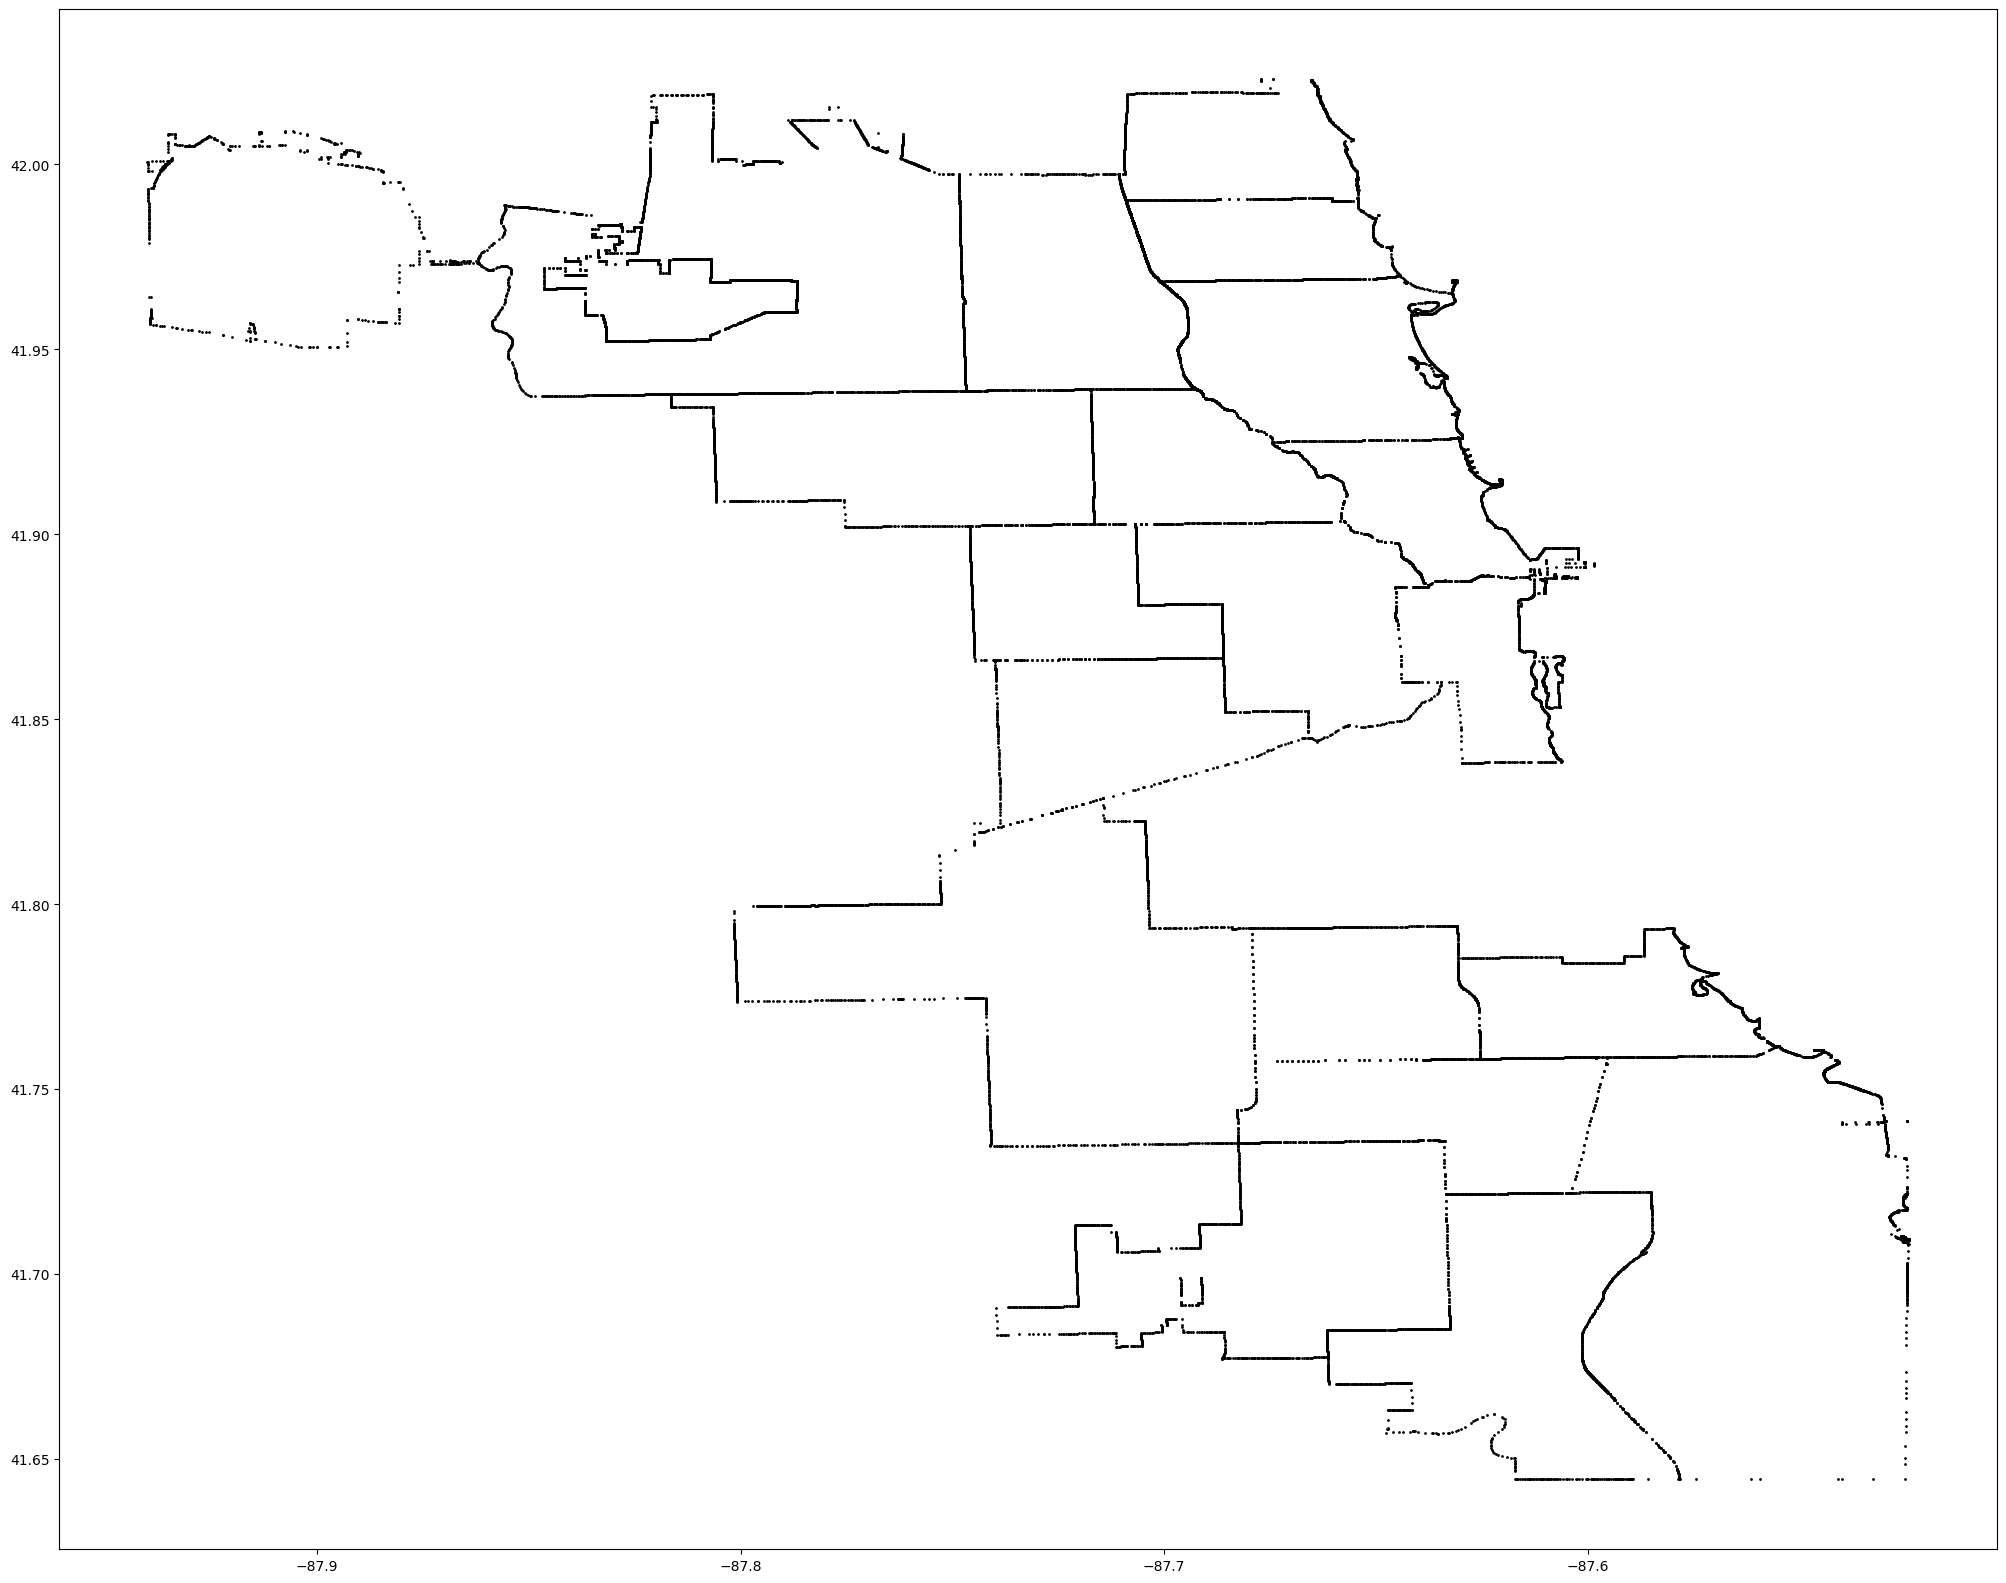

In [9]:
with open('CPDdistricts.geojson') as json_data:
    district_data = json.load(json_data)
districts=district_data['features']
#initialize the plot dimensions
fig=plt.figure(figsize=(25,20))
#create a plot axis
ax=fig.add_subplot(1,1,1)
#add the beat boundaries
ind=0
while (ind<22):
    for coordlist in districts[ind]['geometry']['coordinates']:
        data=np.array(coordlist,dtype=object)
        flat=[]
        for i in data:
            for j in i:
                flat.append(j)
        x,y=np.array(flat).T
        ax.plot(x,y,'o',markerfacecolor='k',markeredgecolor='k',markersize=1)
        ind+=1

Let's add the Cluster number to each location.

In [10]:
k_means = KMeans(n_clusters=22)
k_means.fit(violence)
k_means_labels = k_means.labels_
violence["Cluster"] = k_means_labels
violence.head()

//anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,LATITUDE,LONGITUDE,Cluster
0,41.865451,-87.725050,19
1,41.874440,-87.717590,19
2,41.923618,-87.803495,20
3,41.800621,-87.663270,15
4,41.865637,-87.720071,19


Now we can add the cluster numbers to the district boundary map.

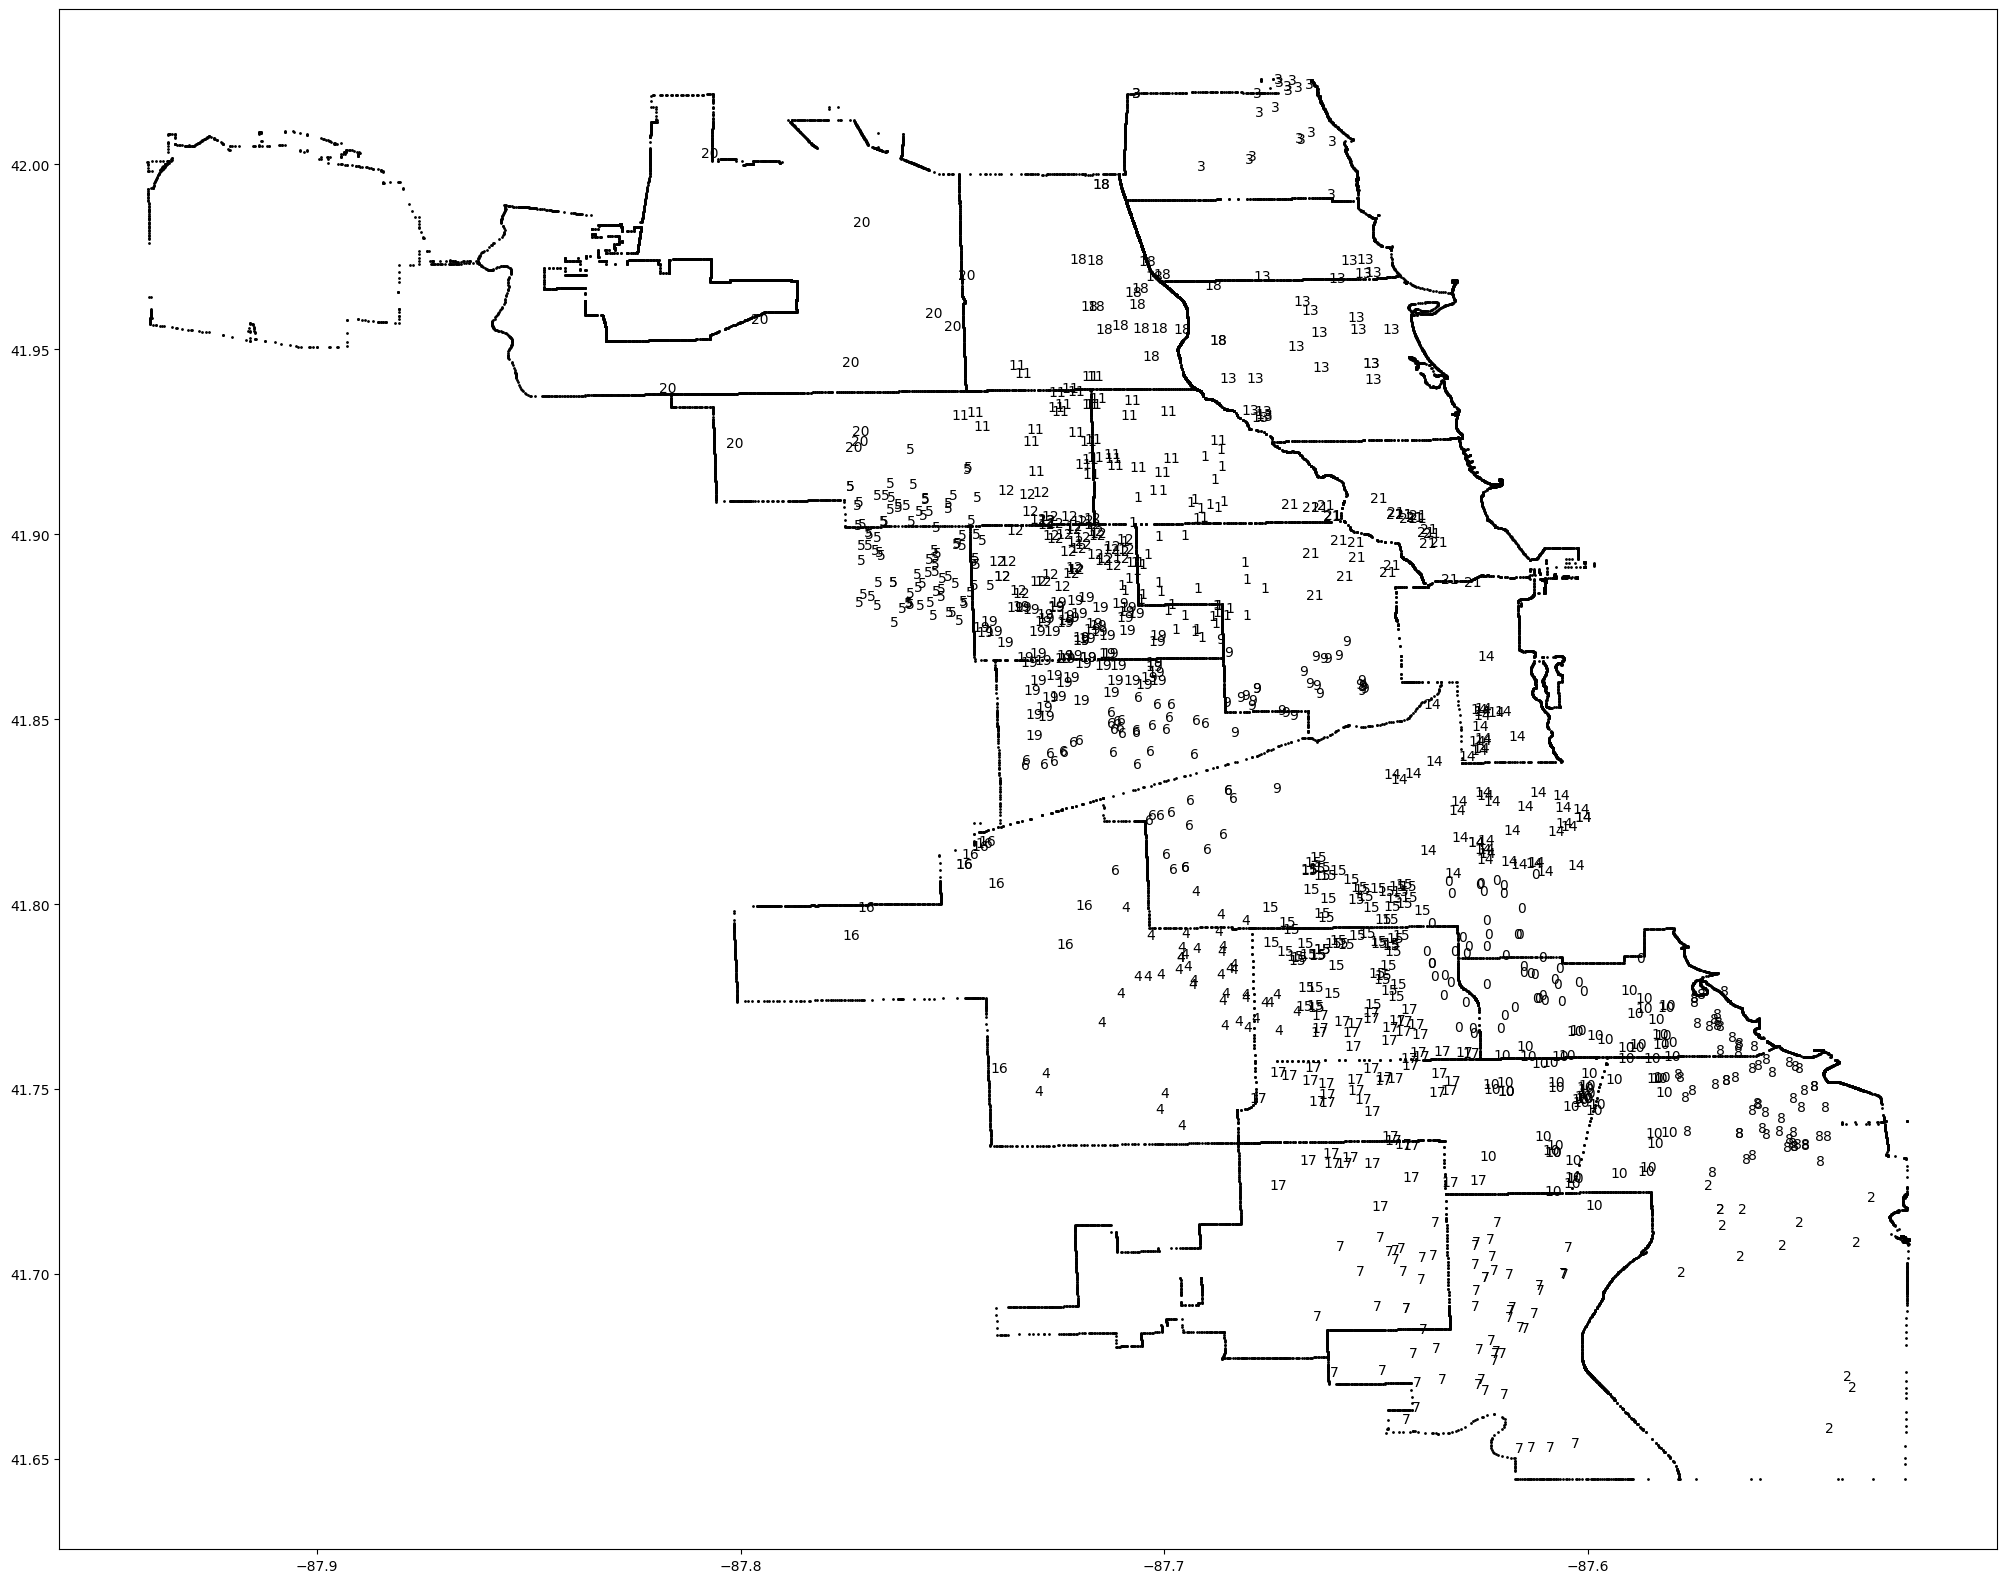

In [11]:
fig=plt.figure(figsize=(25,20))
#create a plot axis
ax=fig.add_subplot(1,1,1)
#add the clusters

for i in violence.index:
    plt.text(violence.loc[i,"LONGITUDE"],violence.loc[i,"LATITUDE"],str(violence.loc[i,"Cluster"]))


#add the beat boundaries
ind=0
while (ind<22):
    for coordlist in districts[ind]['geometry']['coordinates']:
        data=np.array(coordlist,dtype=object)
        flat=[]
        for i in data:
            for j in i:
                flat.append(j)
        x,y=np.array(flat).T
        ax.plot(x,y,'o',markerfacecolor='k',markeredgecolor='k',markersize=1)
        ind+=1

While it is not perfect, our k-means algorithm clustered the violent occurrences in a similar manner to the police district boundaries.
